#start

In [8]:
import sys

print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)

Python version
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Version info.
sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [9]:
# import our google sheet that was the data
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

spreadsheet = gc.open('TrainOnMe')

worksheet = spreadsheet.worksheet('uncleaned_data')


data = worksheet.get_all_values()

import pandas as pd
Original_df = pd.DataFrame(data[1:], columns=data[0])

Original_df = Original_df.drop(columns=[''])


Original_df

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,Jorgutob,106.17818,-0.39869,-102.00207,-3.22962,116.02387,30.92565,Nymble,4.18083,2.59313,11.06927,-0.74575,TRUE,4.7989
1,Atsorg,101.2614,0.20882,-98.32359,-3.27023,111.02062,16.48014,7-11,0.58313,-1.32643,10.15872,1.12492,FALSE,4.57145
2,Jorgutob,99.28534,0.27119,-99.40607,-3.26871,108.98401,22.23892,7-11,-1.38677,-0.07693,14.58203,-1.40387,FALSE,4.46724
3,Jorgutob,105.49639,0.05855,-98.72551,-3.22831,115.36749,51.24367,Nymble,0.37063,-0.71831,12.89031,-2.0183,FALSE,4.78119
4,Atsorg,94.9922,-1.06556,-98.36843,-3.21971,105.00413,32.40184,Nymble,0.11423,-0.60155,12.64336,-2.12341,TRUE,4.25777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Atsorg,93.29746,-0.46663,-101.12603,-3.22514,103.24397,26.48341,Nymble,1.12026,0.04354,11.96981,-3.14526,TRUE,4.15924
996,Atsorg,96.12402,-0.2017,-96.271,-3.27562,105.87731,31.48175,7-11,0.83622,-0.02262,11.87972,-1.33804,FALSE,4.32485
997,Bobsuto,102.60173,0.18293,-93.79591,-3.19984,112.50562,14.6974,SisterOchBro,-0.49907,2.14072,11.35781,-2.48599,FALSE,4.66111
998,Bobsuto,107.02096,0.16405,-95.09993,-3.24281,117.0625,40.86545,ÖstraStationen,-0.90454,1.27235,10.03335,0.69518,FALSE,4.87555


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y = Original_df['y']

y_encoded = label_encoder.fit_transform(y)
Original_df.insert(0, 'y_encoded', y_encoded)
Original_df

,y_encoded,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,2,Jorgutob,106.17818,-0.39869,-102.00207,-3.22962,116.02387,30.92565,Nymble,4.18083,2.59313,11.06927,-0.74575,TRUE,4.7989
1,0,Atsorg,101.2614,0.20882,-98.32359,-3.27023,111.02062,16.48014,7-11,0.58313,-1.32643,10.15872,1.12492,FALSE,4.57145
2,2,Jorgutob,99.28534,0.27119,-99.40607,-3.26871,108.98401,22.23892,7-11,-1.38677,-0.07693,14.58203,-1.40387,FALSE,4.46724
3,2,Jorgutob,105.49639,0.05855,-98.72551,-3.22831,115.36749,51.24367,Nymble,0.37063,-0.71831,12.89031,-2.0183,FALSE,4.78119
4,0,Atsorg,94.9922,-1.06556,-98.36843,-3.21971,105.00413,32.40184,Nymble,0.11423,-0.60155,12.64336,-2.12341,TRUE,4.25777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,Atsorg,93.29746,-0.46663,-101.12603,-3.22514,103.24397,26.48341,Nymble,1.12026,0.04354,11.96981,-3.14526,TRUE,4.15924
996,0,Atsorg,96.12402,-0.2017,-96.271,-3.27562,105.87731,31.48175,7-11,0.83622,-0.02262,11.87972,-1.33804,FALSE,4.32485
997,1,Bobsuto,102.60173,0.18293,-93.79591,-3.19984,112.50562,14.6974,SisterOchBro,-0.49907,2.14072,11.35781,-2.48599,FALSE,4.66111
998,1,Bobsuto,107.02096,0.16405,-95.09993,-3.24281,117.0625,40.86545,ÖstraStationen,-0.90454,1.27235,10.03335,0.69518,FALSE,4.87555


In [11]:
y_encoded

array([2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0,
       2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 1,
       2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1,
       0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2,
       2, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1,
       1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1,
       2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2,
       2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0,
       0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0,

In [12]:
Original_df.dtypes

y_encoded     int64
y            object
x1           object
x2           object
x3           object
x4           object
x5           object
x6           object
x7           object
x8           object
x9           object
x10          object
x11          object
x12          object
x13          object
dtype: object

In [13]:
flo_columns = ['x1', 'x2','x3','x4','x5','x6','x8','x9','x10','x11','x13']
for column in flo_columns:
    Original_df[column] = Original_df[column].astype(float)
Original_df.dtypes
# Original_df[''] = Original_df[''].astype(int)


y_encoded      int64
y             object
x1           float64
x2           float64
x3           float64
x4           float64
x5           float64
x6           float64
x7            object
x8           float64
x9           float64
x10          float64
x11          float64
x12           object
x13          float64
dtype: object

In [14]:
Original_df.describe()

,y_encoded,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x13
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.149000,100.105076,-0.003122,-100.027156,-3.238869,109.980318,25.487262,-0.058048,0.011604,11.234451,-0.669466,4.505118
std,0.876109,4.097094,0.476082,2.954004,0.023896,4.103218,11.624977,1.349315,1.334597,1.533364,1.925710,0.199993
min,0.000000,85.579520,-1.514660,-110.111230,-3.290920,95.616710,-19.274780,-4.965520,-4.241330,6.126880,-5.618830,3.784270
25%,0.000000,97.286687,-0.322100,-102.006955,-3.257570,107.183173,17.800205,-0.857982,-0.858680,10.169647,-1.992347,4.365160
50%,1.000000,100.113570,0.011160,-99.995870,-3.239515,110.029375,25.884875,-0.110020,0.082885,11.224835,-1.055760,4.504515
75%,2.000000,102.843357,0.315510,-98.024282,-3.220965,112.710432,33.678553,0.733660,0.861150,12.249723,0.316010,4.638363
max,2.000000,112.238520,1.425970,-90.623620,-3.182310,122.000120,57.291250,5.562360,4.540140,16.052440,5.333450,5.117260


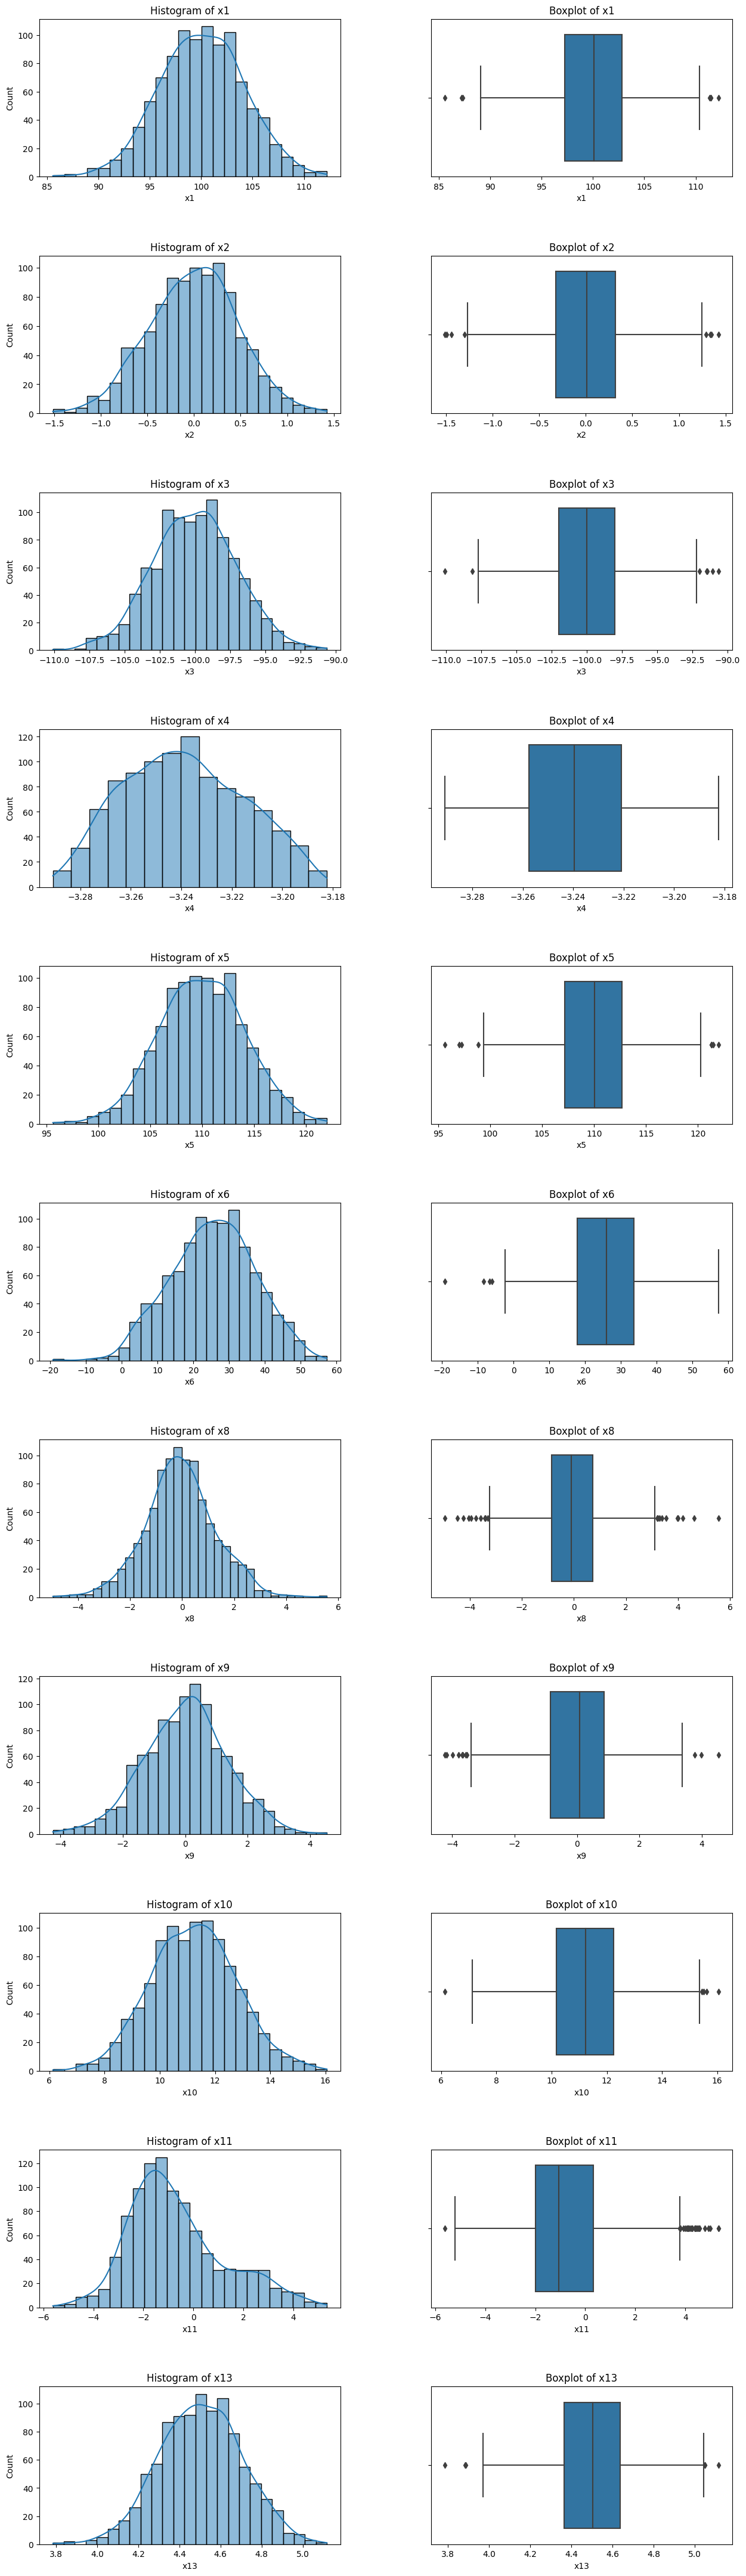

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(flo_columns), 2, figsize=(15, 5 * len(flo_columns)))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(flo_columns):
    sns.histplot(Original_df[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}')
    sns.boxplot(x=Original_df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.show()


In [16]:
Original_df['x7'].nunique()

5

In [17]:
Original_df['y'].nunique()

3

<ipython-input-18-0d0841dfb390>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Original_df_cor.corr()


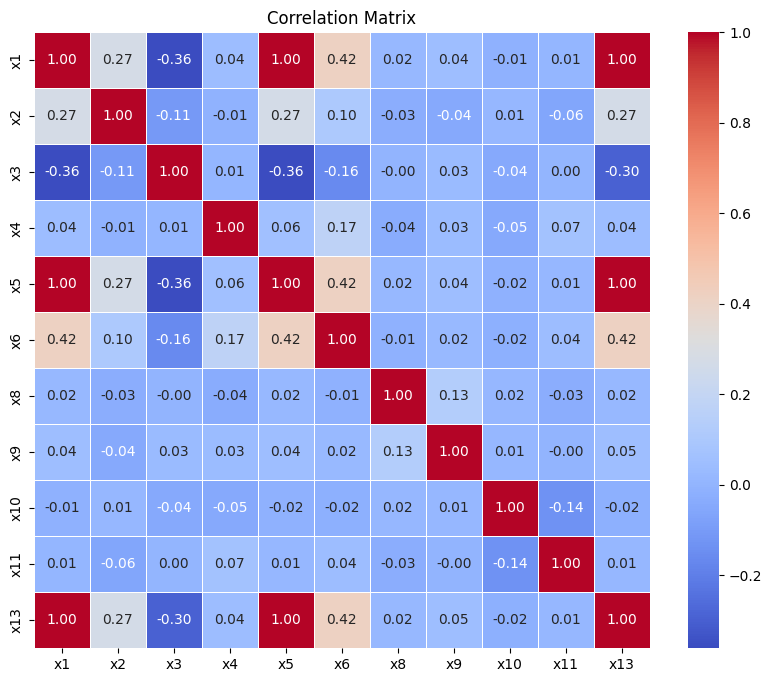

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Original_df_cor = Original_df.drop(columns=['y_encoded'])
correlation_matrix = Original_df_cor.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)


plt.title('Correlation Matrix')


plt.show()


In [19]:
sns.pairplot(Original_df)

plt.tight_layout()

plt.show()

Output hidden; open in https://colab.research.google.com to view.

#One hot encode and trimming



In [20]:
encode_col = 'x7'
Original_df_enc =pd.get_dummies(Original_df,columns=[encode_col])

In [21]:
print(Original_df_enc.columns)


Index(['y_encoded', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x7_7-11', 'x7_Nymble', 'x7_Q', 'x7_SisterOchBro',
       'x7_ÖstraStationen'],
      dtype='object')


<ipython-input-22-0a2ecbae265a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Original_df_enc.corr()


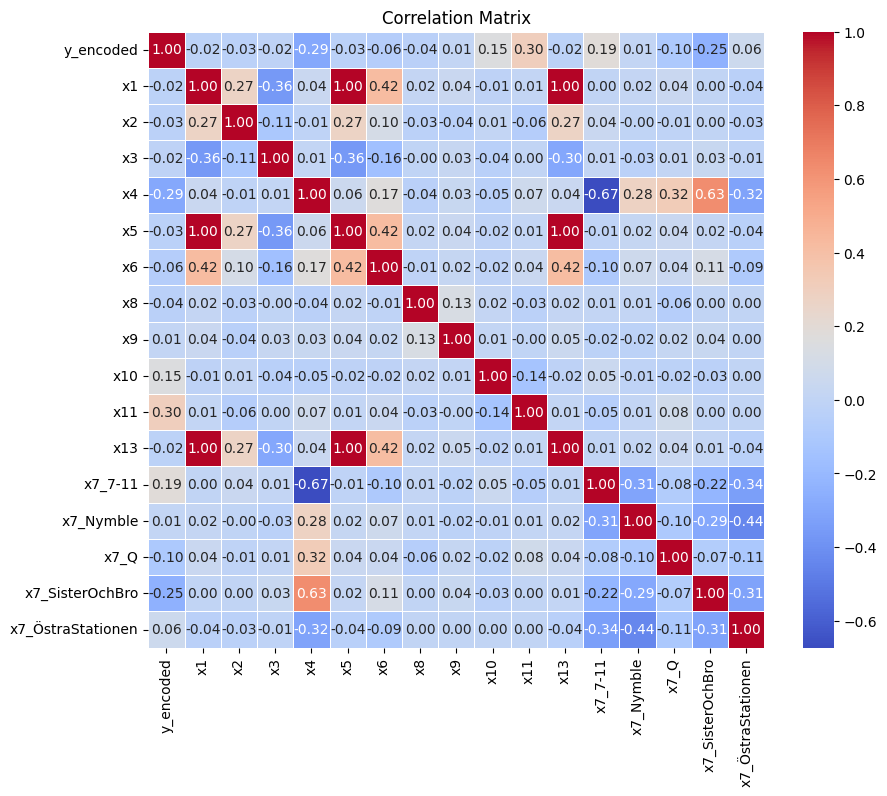

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = Original_df_enc.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)


plt.title('Correlation Matrix')


plt.show()


In [23]:
Original_df_enc['x12'] = Original_df_enc['x12'].replace({'TRUE': True, 'FALSE': False})

Original_df_enc['x12'] = Original_df_enc['x12'].astype(int)

In [24]:
Original_df_enc

,y_encoded,y,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x12,x13,x7_7-11,x7_Nymble,x7_Q,x7_SisterOchBro,x7_ÖstraStationen
0,2,Jorgutob,106.17818,-0.39869,-102.00207,-3.22962,116.02387,30.92565,4.18083,2.59313,11.06927,-0.74575,1,4.79890,0,1,0,0,0
1,0,Atsorg,101.26140,0.20882,-98.32359,-3.27023,111.02062,16.48014,0.58313,-1.32643,10.15872,1.12492,0,4.57145,1,0,0,0,0
2,2,Jorgutob,99.28534,0.27119,-99.40607,-3.26871,108.98401,22.23892,-1.38677,-0.07693,14.58203,-1.40387,0,4.46724,1,0,0,0,0
3,2,Jorgutob,105.49639,0.05855,-98.72551,-3.22831,115.36749,51.24367,0.37063,-0.71831,12.89031,-2.01830,0,4.78119,0,1,0,0,0
4,0,Atsorg,94.99220,-1.06556,-98.36843,-3.21971,105.00413,32.40184,0.11423,-0.60155,12.64336,-2.12341,1,4.25777,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,Atsorg,93.29746,-0.46663,-101.12603,-3.22514,103.24397,26.48341,1.12026,0.04354,11.96981,-3.14526,1,4.15924,0,1,0,0,0
996,0,Atsorg,96.12402,-0.20170,-96.27100,-3.27562,105.87731,31.48175,0.83622,-0.02262,11.87972,-1.33804,0,4.32485,1,0,0,0,0
997,1,Bobsuto,102.60173,0.18293,-93.79591,-3.19984,112.50562,14.69740,-0.49907,2.14072,11.35781,-2.48599,0,4.66111,0,0,0,1,0
998,1,Bobsuto,107.02096,0.16405,-95.09993,-3.24281,117.06250,40.86545,-0.90454,1.27235,10.03335,0.69518,0,4.87555,0,0,0,0,1


In [25]:

Original_df_enc['x7_7-11'] = Original_df_enc['x7_7-11'].astype(int)
Original_df_enc['x7_Q'] = Original_df_enc['x7_Q'].astype(int)
Original_df_enc['x7_SisterOchBro'] = Original_df_enc['x7_SisterOchBro'].astype(int)
Original_df_enc['x7_ÖstraStationen'] = Original_df_enc['x7_ÖstraStationen'].astype(int)

Original_df_enc.dtypes

y_encoded              int64
y                     object
x1                   float64
x2                   float64
x3                   float64
x4                   float64
x5                   float64
x6                   float64
x8                   float64
x9                   float64
x10                  float64
x11                  float64
x12                    int64
x13                  float64
x7_7-11                int64
x7_Nymble              uint8
x7_Q                   int64
x7_SisterOchBro        int64
x7_ÖstraStationen      int64
dtype: object

In [26]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df= Original_df_enc.drop(columns=['y','y_encoded','x7_SisterOchBro'])
X = sm.add_constant(vif_df)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              feature           VIF
0               const  3.461403e+05
1                  x1  5.101605e+09
2                  x2  1.278605e+00
3                  x3  2.652012e+07
4                  x4  1.475417e+01
5                  x5  4.276719e+03
6                  x6  1.254654e+00
7                  x8  1.030520e+00
8                  x9  1.030042e+00
9                 x10  1.028708e+00
10                x11  1.038176e+00
11                x12  1.192410e+00
12                x13  4.862349e+09
13            x7_7-11  1.736378e+01
14          x7_Nymble  4.356304e+00
15               x7_Q  1.276821e+00
16  x7_ÖstraStationen  1.181457e+01


#scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaling_features = ['x1','x2','x3','x4','x5','x6','x8','x9','x10','x11','x13']
scaler = StandardScaler()
Original_df_enc[scaling_features] = scaler.fit_transform(Original_df_enc[scaling_features])
Original_df_enc

,y_encoded,y,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x12,x13,x7_7-11,x7_Nymble,x7_Q,x7_SisterOchBro,x7_ÖstraStationen
0,2,Jorgutob,1.483037,-0.831298,-0.668889,0.387226,1.473618,0.468053,3.143075,1.935278,-0.107779,-0.039633,1,1.469695,0,1,0,0,0
1,0,Atsorg,0.282371,0.445403,0.576986,-1.313064,0.253660,-0.775195,0.475425,-1.003077,-0.701901,0.932271,0,0.331837,1,0,0,0,0
2,2,Jorgutob,-0.200178,0.576475,0.210358,-1.249424,-0.242933,-0.279568,-0.985231,-0.066371,2.184252,-0.381559,0,-0.189491,1,0,0,0,0
3,2,Jorgutob,1.316546,0.129606,0.440858,0.442074,1.313571,2.216718,0.317859,-0.547191,1.080426,-0.700785,0,1.381097,0,1,0,0,0
4,0,Atsorg,-1.248552,-2.232746,0.561799,0.802145,-1.213359,0.595101,0.127742,-0.459660,0.919295,-0.755395,1,-1.237400,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,Atsorg,-1.662403,-0.974076,-0.372181,0.574798,-1.642544,0.085733,0.873700,0.023941,0.479812,-1.286296,1,-1.730314,0,1,0,0,0
996,0,Atsorg,-0.972164,-0.417318,1.272184,-1.538737,-1.000449,0.515914,0.663088,-0.025657,0.421029,-0.347357,0,-0.901821,1,0,0,0,0
997,1,Bobsuto,0.609677,0.390994,2.110479,1.634077,0.615752,-0.928626,-0.327013,1.596123,0.080490,-0.943773,0,0.780377,0,0,0,1,0
998,1,Bobsuto,1.688842,0.351317,1.668817,-0.165023,1.726870,1.323519,-0.627664,0.945136,-0.783703,0.709000,0,1.853149,0,0,0,0,1


#pca all

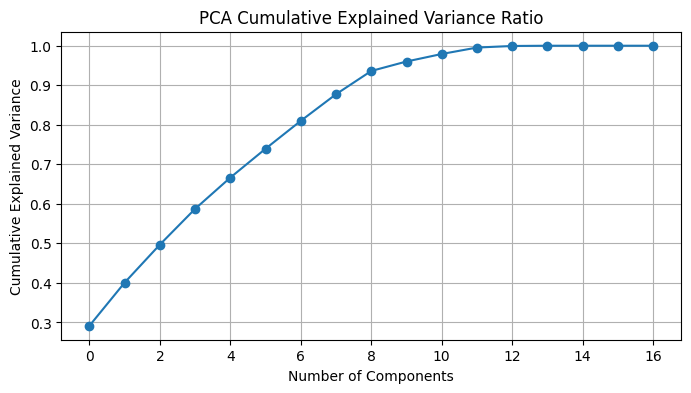

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()


pca_data=Original_df_enc.drop(columns= ['y','y_encoded'])
pca.fit(pca_data)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=8)
pca.fit(pca_data)
principalComponents = pca.transform(pca_data)

pca_df = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8'])#'pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16',
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-2.534494,0.297881,3.670122,0.729495,0.338638,1.050280,-0.319667,-0.060600
1,-0.107341,-0.858735,-0.775899,1.739720,-0.607276,0.544831,0.243482,0.894183
2,0.436361,-2.024884,-0.590438,-0.986899,0.510023,-1.111258,1.008042,0.646221
3,-2.675752,0.131632,0.242558,-1.378893,0.264651,0.063211,-0.619469,1.618913
4,2.311757,0.846425,0.592484,-1.281812,1.670875,0.149337,-1.227429,0.628538
...,...,...,...,...,...,...,...,...
995,2.682005,0.110208,0.967605,-1.331023,0.676236,0.995722,-0.707960,-0.650201
996,1.808136,-1.151790,0.531981,0.361185,-0.173446,-0.206967,-0.343430,1.266263
997,-0.483083,0.863262,1.209064,-1.278752,-1.843114,-1.585692,-0.340599,0.514175
998,-2.821355,0.759363,0.211089,1.036346,-1.099559,-1.843035,-0.332655,1.436060


In [ ]:
columns_to_add = Original_df_enc[['y', 'y_encoded']]
pca_df = pd.concat([pca_df, columns_to_add], axis=1)
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,y,y_encoded
0,-2.534494,0.297881,3.670122,0.729495,0.338638,1.050280,-0.319667,-0.060600,Jorgutob,2
1,-0.107341,-0.858735,-0.775899,1.739720,-0.607276,0.544831,0.243482,0.894183,Atsorg,0
2,0.436361,-2.024884,-0.590438,-0.986899,0.510023,-1.111258,1.008042,0.646221,Jorgutob,2
3,-2.675752,0.131632,0.242558,-1.378893,0.264651,0.063211,-0.619469,1.618913,Jorgutob,2
4,2.311757,0.846425,0.592484,-1.281812,1.670875,0.149337,-1.227429,0.628538,Atsorg,0
...,...,...,...,...,...,...,...,...,...,...
995,2.682005,0.110208,0.967605,-1.331023,0.676236,0.995722,-0.707960,-0.650201,Atsorg,0
996,1.808136,-1.151790,0.531981,0.361185,-0.173446,-0.206967,-0.343430,1.266263,Atsorg,0
997,-0.483083,0.863262,1.209064,-1.278752,-1.843114,-1.585692,-0.340599,0.514175,Bobsuto,1
998,-2.821355,0.759363,0.211089,1.036346,-1.099559,-1.843035,-0.332655,1.436060,Bobsuto,1


<ipython-input-24-d7bb71f2a3be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pca_df.corr()


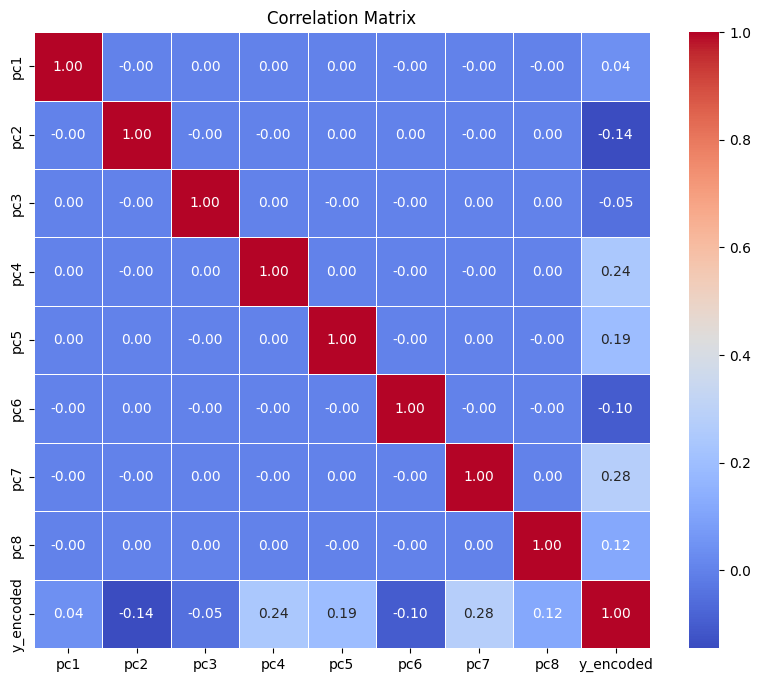

In [ ]:
correlation_matrix = pca_df.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)


plt.title('Correlation Matrix')


plt.show()

##model

In [ ]:
df=pca_df
df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,y,y_encoded
0,-2.534494,0.297881,3.670122,0.729495,0.338638,1.050280,-0.319667,-0.060600,Jorgutob,2
1,-0.107341,-0.858735,-0.775899,1.739720,-0.607276,0.544831,0.243482,0.894183,Atsorg,0
2,0.436361,-2.024884,-0.590438,-0.986899,0.510023,-1.111258,1.008042,0.646221,Jorgutob,2
3,-2.675752,0.131632,0.242558,-1.378893,0.264651,0.063211,-0.619469,1.618913,Jorgutob,2
4,2.311757,0.846425,0.592484,-1.281812,1.670875,0.149337,-1.227429,0.628538,Atsorg,0
...,...,...,...,...,...,...,...,...,...,...
995,2.682005,0.110208,0.967605,-1.331023,0.676236,0.995722,-0.707960,-0.650201,Atsorg,0
996,1.808136,-1.151790,0.531981,0.361185,-0.173446,-0.206967,-0.343430,1.266263,Atsorg,0
997,-0.483083,0.863262,1.209064,-1.278752,-1.843114,-1.585692,-0.340599,0.514175,Bobsuto,1
998,-2.821355,0.759363,0.211089,1.036346,-1.099559,-1.843035,-0.332655,1.436060,Bobsuto,1


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
def print_best_trials(study, trial):
    print("Best trials so far:")
    for t in study.best_trials:
        print(f"Trial number: {t.number}")
        print(f"  Values: {t.values}")
        print("  Params: ")
        for key, value in t.params.items():
            print(f"    - {key}: {value}")
        print("\n")

In [ ]:
random_seed = 8
y = df['y_encoded']
X = df.drop(columns=['y', 'y_encoded'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, stratify=y_train, random_state=random_seed)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=random_seed)
# X_val_1, X_temp, y_val_1, y_temp = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=random_seed)
# X_val_2, X_test, y_val_2, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=random_seed)

In [ ]:
!pip install optuna
import pandas as pd
import optuna
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC

results1 = []

rf_params_list = [
    {'n_estimators': 225, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'},
    {'n_estimators': 405, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto'}

]

xgbrf_params_list = [
    {'n_estimators': 74, 'max_depth': 10, 'learning_rate': 0.1840791382463993, 'subsample': 0.8780865946450704, 'colsample_bytree': 0.9367271285264277},
    {'n_estimators': 76, 'max_depth': 10, 'learning_rate': 0.18275556278137406, 'subsample': 0.8680224443952966, 'colsample_bytree': 0.9765350034005935},
    {'n_estimators': 124, 'max_depth': 11, 'learning_rate': 0.20525316439534286, 'subsample': 0.9433598122598765, 'colsample_bytree': 0.9735387654888713},
    {'n_estimators': 69, 'max_depth': 21, 'learning_rate': 0.13217383390021212, 'subsample': 0.8185160125556292, 'colsample_bytree': 0.9092187837048662}
]


svm_params_list = [
    {'C': 4.347223759779671, 'kernel': 'rbf', 'gamma': 'scale'},
    {'C': 1.1527794523137098, 'kernel': 'rbf', 'gamma': 'scale'},
    {'C': 1.1505108461455948, 'kernel': 'rbf', 'gamma': 'scale'},
    {'C': 1.0330037787553308, 'kernel': 'rbf', 'gamma': 'scale'},
    {'C': 1.036952394383946, 'kernel': 'rbf', 'gamma': 'scale'}
]

meta_learners = [
    LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0, random_state=random_seed),
    RidgeClassifier(alpha=1.0, random_state=random_seed),
    SVC(probability=True, random_state=random_seed)
]


def objective(trial):

    # RANDOM FOREST
        RF_params_index = trial.suggest_int('RF_params', 0, len(rf_params_list) - 1)
        rf_params = rf_params_list[RF_params_index]
        rf = RandomForestClassifier(**rf_params)
        rf.fit(X_train, y_train)

    # XGBRF
        XGBRF_params_index = trial.suggest_int('XGBRF_params', 0, len(xgbrf_params_list) - 1)
        xgbrf_params = xgbrf_params_list[XGBRF_params_index]
        xgbrf = XGBRFClassifier(**xgbrf_params)
        xgbrf.fit(X_train, y_train)


  # SVM
        SVM_params_index = trial.suggest_int('SVM_params', 0, len(svm_params_list) - 1)
        svm_params = svm_params_list[SVM_params_index]
        svm = SVC(**svm_params)
        svm.fit(X_train, y_train)

  # Ensemble


        meta_learner_index = trial.suggest_int('meta_learner', 0, len(meta_learners) - 1)
        final_estimator = meta_learners[meta_learner_index]

        stacking_clf = StackingClassifier(
        estimators=[('rf', rf), ('xgbrf', xgbrf), ('svm', svm)],
        final_estimator=final_estimator
        )
        stacking_clf.fit(X_train, y_train)
        y_stacking_clf_pred = stacking_clf.predict(X_val)
        accuracy_stacking_clf = accuracy_score(y_val, y_stacking_clf_pred)

   #Cross validation training accuracy
        strat_k_fold=StratifiedKFold(n_splits=7, shuffle=True, random_state=random_seed)
        crossAcc = cross_val_score(stacking_clf, X_val, y_val, cv=strat_k_fold, n_jobs=-1).mean()


        return accuracy_stacking_clf, crossAcc


sampler = optuna.samplers.TPESampler(seed=random_seed)
study = optuna.create_study(directions=['maximize', 'maximize'], sampler=sampler)
study.optimize(objective, n_trials=1000, callbacks=[print_best_trials])

for trial in study.best_trials:

            best_params = study.best_trial.params


            rf_best = RandomForestClassifier(
                n_estimators=best_params['n_estimators_RF'],
                max_depth=best_params['max_depth_RF'],
                min_samples_split=best_params['min_samples_split'],
                min_samples_leaf=best_params['min_samples_leaf'],
                max_features=best_params['max_features'],
                random_state=random_seed
            )


            xgbrf_best = XGBRFClassifier(
                n_estimators=best_params['n_estimators_XGBRF'],
                max_depth=best_params['max_depth_XGBRF'],
                learning_rate=best_params['learning_rate'],
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree'],
                random_state=random_seed
            )

            svm_best = SVC(
                C=best_params['C'],
                kernel=best_params['kernel'],
                gamma=best_params['gamma'],
                random_state=random_seed
            )

            stacking_clf_best = StackingClassifier(
                estimators=[('rf', rf_best), ('xgbrf', xgbrf_best), ('svm', svm_best)],
                final_estimator=LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0, random_state=random_seed),

            )

            stacking_clf_best.fit(X_train, y_train)



            # Additional metrics calculations
            cv_splitter = KFold(n_splits=7, shuffle=True, random_state=random_seed)


            y_pred_best = stacking_clf_best.predict(X_test)
            accuracy_best = accuracy_score(y_test, y_pred_best)
            precision_best = precision_score(y_test, y_pred_best, average='weighted')
            recall_best = recall_score(y_test, y_pred_best, average='weighted')
            f1_best = f1_score(y_test, y_pred_best, average='weighted')
            cross_val_best_stacking_clf_best_train = np.mean(cross_val_score(stacking_clf_best, X_train, y_train, cv=cv_splitter))
            cross_val_best_stacking_clf_best_val = np.mean(cross_val_score(stacking_clf_best, X_val, y_val, cv=cv_splitter))
            cross_val_best_stacking_clf_best_test = np.mean(cross_val_score(stacking_clf_best, X_test, y_test, cv=cv_splitter))
            cross_val_best_stacking_clf_best_all = np.mean(cross_val_score(stacking_clf_best, X, y, cv=cv_splitter))
            y_pred_probs_best = stacking_clf_best.predict_proba(X_val)[:, 1]


            # Bootstrap scores
            stacking_clf_best_bootstrap_scores = []
            n_bootstrap = 100
            for seed in range(8, 8 + n_bootstrap):
                np.random.seed(seed)
                X_test_sample, y_test_sample = resample(X_test, y_test)
                y_pred_sample = stacking_clf_best.predict(X_test_sample)
                score = accuracy_score(y_test_sample, y_pred_sample)
                stacking_clf_best_bootstrap_scores.append(score)
            stacking_clf_best_average_score = np.mean(stacking_clf_best_bootstrap_scores)
            #rf_variance_score = np.var(rf_bootstrap_scores)

            #placebo
            # np.random.seed(random_seed)
            # X_train_random = np.random.random(size=X_train.shape)
            # stacking_clf_best_random = RandomForestClassifier(**trial.params)
            # stacking_clf_best_random.fit(X_train_random, y_train)
            # y_pred_random = stacking_clf_best_random.predict(X_test)
            # accuracy_random = accuracy_score(y_test, y_pred_random)

            # Append results to the list
            results1.append({
                'Best Hyperparameters': trial.params,
                'Accuracy': accuracy_best,
                'Cross Validation test Accuracy':cross_val_best_stacking_clf_best_test,
                'Bootstrap Average Score': stacking_clf_best_average_score,
                # 'Placebo Accuracy': accuracy_random,
                'Cross Validation train Accuracy': cross_val_best_stacking_clf_best_train,
                'cross_val_best_stacking_clf_best_val':cross_val_best_stacking_clf_best_val,
                'Precision': precision_best,
                'Recall': recall_best,
                'F1 Score': f1_best,
                #'Bootstrap Variance Score': rf_variance_score
                })
# Convert results list to DataFrame
results_df1 = pd.DataFrame(results1)

[I 2023-12-19 09:46:57,631] A new study created in memory with name: no-name-0c642384-b6ca-4e01-af4e-5151aa8af6cf
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

Best trials so far:
Trial number: 0
  Values: [0.7569444444444444, 0.7027210884353741]
  Params: 
    - RF_params: 1
    - XGBRF_params: 3
    - SVM_params: 4
    - meta_learner: 1




[I 2023-12-19 09:48:12,360] Trial 1 finished with values: [0.7569444444444444, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 0
  Values: [0.7569444444444444, 0.7027210884353741]
  Params: 
    - RF_params: 1
    - XGBRF_params: 3
    - SVM_params: 4
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1




[I 2023-12-19 09:50:17,393] Trial 4 finished with values: [0.7569444444444444, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1




[I 2023-12-19 09:50:55,222] Trial 5 finished with values: [0.7638888888888888, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1




[I 2023-12-19 09:51:22,147] Trial 6 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 2}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2




[I 2023-12-19 09:51:50,687] Trial 7 finished with values: [0.7708333333333334, 0.6945578231292516] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2




[I 2023-12-19 09:52:17,704] Trial 8 finished with values: [0.7638888888888888, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2




[I 2023-12-19 09:52:45,877] Trial 9 finished with values: [0.75, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 4, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 09:59:37,014] Trial 18 finished with values: [0.7569444444444444, 0.7030612244897959] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 2, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:00:58,372] Trial 20 finished with values: [0.7708333333333334, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:01:26,759] Trial 21 finished with values: [0.7708333333333334, 0.6887755102040816] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:01:56,062] Trial 22 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 2}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:02:24,300] Trial 23 finished with values: [0.7569444444444444, 0.6887755102040816] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:02:56,113] Trial 24 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:03:29,683] Trial 25 finished with values: [0.7638888888888888, 0.695578231292517] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:04:01,296] Trial 26 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 2}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:04:43,454] Trial 27 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 2}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:05:17,851] Trial 28 finished with values: [0.7638888888888888, 0.6676870748299321] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 3, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:06:40,759] Trial 30 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 6
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 10
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 2


Trial number: 11
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 0
    - SVM_params: 1
    - meta_learner: 2


Trial number: 12
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 1
    - meta_learner: 2


Trial number: 16
  Values: [0.7777777777777778, 0.6812925170068027]
  Params: 
    - RF_params: 1
    - XGBRF_params: 2
    - SVM_params: 1
    - meta_learner: 2


[I 2023-12-19 10:19:46,803] Trial 46 finished with values: [0.7916666666666666, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:20:14,776] Trial 47 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:20:43,044] Trial 48 finished with values: [0.7569444444444444, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:21:11,206] Trial 49 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:21:39,667] Trial 50 finished with values: [0.7847222222222222, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:22:07,928] Trial 51 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:22:36,418] Trial 52 finished with values: [0.7916666666666666, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:23:04,842] Trial 53 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:23:33,042] Trial 54 finished with values: [0.7916666666666666, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:24:02,346] Trial 55 finished with values: [0.7847222222222222, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:24:32,115] Trial 56 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:25:00,383] Trial 57 finished with values: [0.7569444444444444, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:25:32,748] Trial 58 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:26:00,462] Trial 59 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:26:28,688] Trial 60 finished with values: [0.7638888888888888, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:27:03,893] Trial 61 finished with values: [0.7777777777777778, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:27:40,453] Trial 62 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:28:14,552] Trial 63 finished with values: [0.7638888888888888, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 2
  Values: [0.7708333333333334, 0.7027210884353742]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 18
  Values: [0.7569444444444444, 0.7030612244897959]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 2
    - meta_learner: 1


Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 10:28:47,650] Trial 64 finished with values: [0.7708333333333334, 0.7224489795918367] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:29:20,032] Trial 65 finished with values: [0.7569444444444444, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:29:51,312] Trial 66 finished with values: [0.75, 0.6959183673469387] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:30:24,370] Trial 67 finished with values: [0.7569444444444444, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:30:55,222] Trial 68 finished with values: [0.7569444444444444, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:31:26,905] Trial 69 finished with values: [0.75, 0.7023809523809523] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:32:00,823] Trial 70 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 2, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:32:31,951] Trial 71 finished with values: [0.7569444444444444, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:33:11,633] Trial 72 finished with values: [0.7569444444444444, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:33:43,009] Trial 73 finished with values: [0.75, 0.7023809523809523] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:34:14,773] Trial 74 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:34:54,413] Trial 75 finished with values: [0.75, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:35:26,446] Trial 76 finished with values: [0.7638888888888888, 0.7027210884353742] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:36:50,342] Trial 78 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:39:14,500] Trial 81 finished with values: [0.7569444444444444, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:39:48,032] Trial 82 finished with values: [0.7569444444444444, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:40:20,448] Trial 83 finished with values: [0.7569444444444444, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:40:52,171] Trial 84 finished with values: [0.7708333333333334, 0.7017006802721087] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:41:24,834] Trial 85 finished with values: [0.7569444444444444, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:41:55,737] Trial 86 finished with values: [0.7708333333333334, 0.7156462585034014] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:42:28,676] Trial 87 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:43:01,169] Trial 88 finished with values: [0.7638888888888888, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:43:32,318] Trial 89 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:44:05,591] Trial 90 finished with values: [0.75, 0.6945578231292515] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:44:36,699] Trial 91 finished with values: [0.7847222222222222, 0.7017006802721087] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 91
  Values: [0.7847222222222222, 0.7017006802721087]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:45:10,167] Trial 92 finished with values: [0.7638888888888888, 0.715986394557823] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 91
  Values: [0.7847222222222222, 0.7017006802721087]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:45:41,982] Trial 93 finished with values: [0.7708333333333334, 0.6952380952380952] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 91
  Values: [0.7847222222222222, 0.7017006802721087]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:46:13,712] Trial 94 finished with values: [0.7777777777777778, 0.7088435374149659] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 91
  Values: [0.7847222222222222, 0.7017006802721087]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 94
  Values: [0.7777777777777778, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:46:48,623] Trial 95 finished with values: [0.7638888888888888, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 91
  Values: [0.7847222222222222, 0.7017006802721087]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 94
  Values: [0.7777777777777778, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:47:20,566] Trial 96 finished with values: [0.7777777777777778, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 91
  Values: [0.7847222222222222, 0.7017006802721087]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:47:48,100] Trial 97 finished with values: [0.7708333333333334, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 91
  Values: [0.7847222222222222, 0.7017006802721087]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:48:18,009] Trial 98 finished with values: [0.75, 0.7017006802721087] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 91
  Values: [0.7847222222222222, 0.7017006802721087]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:48:52,383] Trial 99 finished with values: [0.7569444444444444, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 91
  Values: [0.7847222222222222, 0.7017006802721087]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:49:19,691] Trial 100 finished with values: [0.7847222222222222, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:49:53,599] Trial 101 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:51:09,991] Trial 103 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:51:45,817] Trial 104 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:52:58,679] Trial 106 finished with values: [0.7638888888888888, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:53:27,134] Trial 107 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:54:01,223] Trial 108 finished with values: [0.7569444444444444, 0.6612244897959183] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:55:20,944] Trial 110 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:55:48,399] Trial 111 finished with values: [0.7638888888888888, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:56:14,628] Trial 112 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:56:51,868] Trial 113 finished with values: [0.75, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:58:03,205] Trial 115 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:58:37,260] Trial 116 finished with values: [0.7847222222222222, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 10:59:50,612] Trial 118 finished with values: [0.7638888888888888, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:00:25,047] Trial 119 finished with values: [0.75, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:00:52,870] Trial 120 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:02:06,307] Trial 122 finished with values: [0.75, 0.6891156462585034] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:02:34,612] Trial 123 finished with values: [0.7569444444444444, 0.7091836734693876] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:03:03,078] Trial 124 finished with values: [0.7708333333333334, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:04:29,394] Trial 126 finished with values: [0.7638888888888888, 0.7091836734693878] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:05:05,407] Trial 127 finished with values: [0.7708333333333334, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:05:48,072] Trial 128 finished with values: [0.7847222222222222, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:06:21,212] Trial 129 finished with values: [0.75, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 3, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:06:55,031] Trial 130 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 96
  Values: [0.7777777777777778, 0.708843537414966]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:12:31,795] Trial 136 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:13:07,232] Trial 137 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:13:38,788] Trial 138 finished with values: [0.7708333333333334, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:14:53,401] Trial 140 finished with values: [0.7638888888888888, 0.6741496598639456] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:15:23,192] Trial 141 finished with values: [0.7569444444444444, 0.7156462585034014] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:16:05,186] Trial 142 finished with values: [0.7638888888888888, 0.680612244897959] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:16:36,277] Trial 143 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:18:06,813] Trial 145 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:18:34,553] Trial 146 finished with values: [0.7708333333333334, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:19:02,584] Trial 147 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:20:18,898] Trial 149 finished with values: [0.7708333333333334, 0.6738095238095237] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:20:53,869] Trial 150 finished with values: [0.7569444444444444, 0.7023809523809523] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:22:07,558] Trial 152 finished with values: [0.7638888888888888, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:23:25,106] Trial 154 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:23:54,522] Trial 155 finished with values: [0.7638888888888888, 0.6948979591836736] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:24:23,597] Trial 156 finished with values: [0.7708333333333334, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:25:36,833] Trial 158 finished with values: [0.7638888888888888, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:26:06,413] Trial 159 finished with values: [0.7569444444444444, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:26:35,389] Trial 160 finished with values: [0.7638888888888888, 0.6534013605442176] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 2, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:27:56,103] Trial 162 finished with values: [0.7638888888888888, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:28:24,237] Trial 163 finished with values: [0.7638888888888888, 0.7224489795918367] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:33:24,745] Trial 170 finished with values: [0.7708333333333334, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:33:53,578] Trial 171 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:42:37,132] Trial 183 finished with values: [0.7777777777777778, 0.7017006802721089] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:43:06,510] Trial 184 finished with values: [0.7569444444444444, 0.6945578231292515] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:44:19,462] Trial 186 finished with values: [0.7708333333333334, 0.715986394557823] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:44:48,535] Trial 187 finished with values: [0.7777777777777778, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:45:16,797] Trial 188 finished with values: [0.7777777777777778, 0.7017006802721089] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:45:45,409] Trial 189 finished with values: [0.7847222222222222, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:46:13,805] Trial 190 finished with values: [0.7708333333333334, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:46:42,297] Trial 191 finished with values: [0.7708333333333334, 0.7017006802721089] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:47:10,882] Trial 192 finished with values: [0.7638888888888888, 0.7163265306122447] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:47:39,371] Trial 193 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:48:08,312] Trial 194 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:48:38,667] Trial 195 finished with values: [0.75, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:49:08,360] Trial 196 finished with values: [0.7638888888888888, 0.6948979591836736] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:49:41,339] Trial 197 finished with values: [0.7847222222222222, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:50:09,988] Trial 198 finished with values: [0.7569444444444444, 0.6945578231292515] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:50:38,407] Trial 199 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:51:09,355] Trial 200 finished with values: [0.7569444444444444, 0.6942176870748299] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:51:43,289] Trial 201 finished with values: [0.7569444444444444, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:52:15,505] Trial 202 finished with values: [0.7708333333333334, 0.715986394557823] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:52:45,255] Trial 203 finished with values: [0.7638888888888888, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 11:53:57,810] Trial 205 finished with values: [0.7986111111111112, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:54:25,845] Trial 206 finished with values: [0.7569444444444444, 0.6676870748299321] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:54:54,346] Trial 207 finished with values: [0.7569444444444444, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:55:22,835] Trial 208 finished with values: [0.7569444444444444, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:55:51,199] Trial 209 finished with values: [0.7638888888888888, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 2, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:56:20,113] Trial 210 finished with values: [0.7638888888888888, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:56:48,701] Trial 211 finished with values: [0.7638888888888888, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 4, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:57:22,087] Trial 212 finished with values: [0.7569444444444444, 0.6680272108843538] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:57:50,340] Trial 213 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 3, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:58:18,457] Trial 214 finished with values: [0.7569444444444444, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 3, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:58:48,550] Trial 215 finished with values: [0.7638888888888888, 0.6823129251700681] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 4, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:59:25,500] Trial 216 finished with values: [0.75, 0.6891156462585035] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 11:59:55,087] Trial 217 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:00:27,125] Trial 218 finished with values: [0.7569444444444444, 0.6680272108843538] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:01:03,538] Trial 219 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:01:31,367] Trial 220 finished with values: [0.7569444444444444, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:02:00,376] Trial 221 finished with values: [0.7569444444444444, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:02:27,367] Trial 222 finished with values: [0.7569444444444444, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:03:02,644] Trial 223 finished with values: [0.7569444444444444, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:03:30,205] Trial 224 finished with values: [0.7708333333333334, 0.6680272108843538] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:03:59,433] Trial 225 finished with values: [0.7430555555555556, 0.6680272108843538] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:04:27,348] Trial 226 finished with values: [0.7569444444444444, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:05:02,458] Trial 227 finished with values: [0.7638888888888888, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:05:29,773] Trial 228 finished with values: [0.7708333333333334, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:05:58,173] Trial 229 finished with values: [0.7638888888888888, 0.6676870748299321] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:06:30,166] Trial 230 finished with values: [0.7569444444444444, 0.6680272108843538] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:06:57,165] Trial 231 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:07:23,746] Trial 232 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:07:50,251] Trial 233 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:08:22,841] Trial 234 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:08:49,949] Trial 235 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:09:57,835] Trial 237 finished with values: [0.7569444444444444, 0.6891156462585035] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 3, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:10:31,647] Trial 238 finished with values: [0.7847222222222222, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:11:47,390] Trial 240 finished with values: [0.7986111111111112, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:12:58,147] Trial 242 finished with values: [0.7777777777777778, 0.6952380952380952] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:15:56,747] Trial 246 finished with values: [0.7569444444444444, 0.6945578231292515] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:16:24,477] Trial 247 finished with values: [0.7638888888888888, 0.7153061224489796] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:17:37,781] Trial 249 finished with values: [0.7638888888888888, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:18:05,969] Trial 250 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:19:15,832] Trial 252 finished with values: [0.7708333333333334, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:19:42,644] Trial 253 finished with values: [0.7638888888888888, 0.6945578231292515] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:20:09,963] Trial 254 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:21:21,059] Trial 256 finished with values: [0.7777777777777778, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:21:48,355] Trial 257 finished with values: [0.7777777777777778, 0.6945578231292515] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:22:18,811] Trial 258 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:23:27,993] Trial 260 finished with values: [0.7847222222222222, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:29:37,270] Trial 269 finished with values: [0.7638888888888888, 0.7023809523809523] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:30:04,311] Trial 270 finished with values: [0.7638888888888888, 0.7156462585034014] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:31:15,800] Trial 272 finished with values: [0.7847222222222222, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:31:43,734] Trial 273 finished with values: [0.7361111111111112, 0.7224489795918367] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:32:12,398] Trial 274 finished with values: [0.7708333333333334, 0.7091836734693876] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:32:41,464] Trial 275 finished with values: [0.7847222222222222, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:33:09,984] Trial 276 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:33:41,124] Trial 277 finished with values: [0.7638888888888888, 0.701360544217687] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:34:56,698] Trial 279 finished with values: [0.7638888888888888, 0.7023809523809523] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:35:25,063] Trial 280 finished with values: [0.7569444444444444, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:36:40,846] Trial 282 finished with values: [0.7569444444444444, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:37:09,770] Trial 283 finished with values: [0.7777777777777778, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:38:24,460] Trial 285 finished with values: [0.7638888888888888, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:38:53,794] Trial 286 finished with values: [0.7569444444444444, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:39:23,533] Trial 287 finished with values: [0.7777777777777778, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:40:42,506] Trial 289 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:41:12,777] Trial 290 finished with values: [0.7708333333333334, 0.6952380952380952] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




[I 2023-12-19 12:41:41,765] Trial 291 finished with values: [0.7777777777777778, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 12:53:44,731] Trial 307 finished with values: [0.7638888888888888, 0.7088435374149659] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 12:54:59,444] Trial 309 finished with values: [0.7708333333333334, 0.7153061224489796] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 12:55:27,010] Trial 310 finished with values: [0.7638888888888888, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 12:56:39,061] Trial 312 finished with values: [0.7708333333333334, 0.680612244897959] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 12:57:05,898] Trial 313 finished with values: [0.7569444444444444, 0.6874149659863944] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 12:58:18,175] Trial 315 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 12:58:46,445] Trial 316 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 12:59:58,362] Trial 318 finished with values: [0.7708333333333334, 0.6952380952380952] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:00:26,022] Trial 319 finished with values: [0.7569444444444444, 0.6891156462585035] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 3, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:01:39,327] Trial 321 finished with values: [0.7708333333333334, 0.6959183673469387] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 100
  Values: [0.7847222222222222, 0.7020408163265305]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:02:07,912] Trial 322 finished with values: [0.7847222222222222, 0.7088435374149659] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:02:36,046] Trial 323 finished with values: [0.7569444444444444, 0.6959183673469387] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:03:03,475] Trial 324 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:04:17,013] Trial 326 finished with values: [0.75, 0.7017006802721089] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:05:31,397] Trial 328 finished with values: [0.7638888888888888, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:05:58,190] Trial 329 finished with values: [0.7638888888888888, 0.6952380952380952] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:06:26,061] Trial 330 finished with values: [0.7708333333333334, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:07:37,667] Trial 332 finished with values: [0.7638888888888888, 0.6945578231292516] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:08:48,355] Trial 334 finished with values: [0.7569444444444444, 0.6680272108843538] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 46
  Values: [0.7916666666666666, 0.6948979591836734]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learn

[I 2023-12-19 13:09:15,626] Trial 335 finished with values: [0.7916666666666666, 0.7085034013605441] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:09:50,296] Trial 336 finished with values: [0.7569444444444444, 0.6887755102040816] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:10:23,367] Trial 337 finished with values: [0.7569444444444444, 0.7023809523809523] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:10:58,382] Trial 338 finished with values: [0.7569444444444444, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:11:27,361] Trial 339 finished with values: [0.7638888888888888, 0.7023809523809523] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:11:54,785] Trial 340 finished with values: [0.7569444444444444, 0.6744897959183673] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 3, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:13:06,215] Trial 342 finished with values: [0.75, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:13:34,521] Trial 343 finished with values: [0.7777777777777778, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 4, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:14:51,066] Trial 345 finished with values: [0.7777777777777778, 0.6673469387755101] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:15:17,593] Trial 346 finished with values: [0.7569444444444444, 0.7030612244897959] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 3, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:16:30,036] Trial 348 finished with values: [0.7569444444444444, 0.6887755102040817] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 2, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:17:38,676] Trial 350 finished with values: [0.7638888888888888, 0.6955782312925171] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:18:05,292] Trial 351 finished with values: [0.7638888888888888, 0.716326530612245] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 1, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:19:21,478] Trial 353 finished with values: [0.7708333333333334, 0.701360544217687] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:19:54,702] Trial 354 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:21:11,575] Trial 356 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:21:39,211] Trial 357 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:23:01,981] Trial 359 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:24:16,071] Trial 361 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:24:50,128] Trial 362 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:25:59,754] Trial 364 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:26:27,215] Trial 365 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:27:37,157] Trial 367 finished with values: [0.7638888888888888, 0.715986394557823] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:28:09,586] Trial 368 finished with values: [0.75, 0.7088435374149659] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:29:18,465] Trial 370 finished with values: [0.7708333333333334, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:29:45,858] Trial 371 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:30:56,273] Trial 373 finished with values: [0.7569444444444444, 0.6806122448979591] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:31:24,035] Trial 374 finished with values: [0.7569444444444444, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:32:42,052] Trial 376 finished with values: [0.7708333333333334, 0.7085034013605441] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:33:09,596] Trial 377 finished with values: [0.7708333333333334, 0.7017006802721087] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:34:28,034] Trial 379 finished with values: [0.7708333333333334, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:34:56,062] Trial 380 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:36:07,834] Trial 382 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:36:36,452] Trial 383 finished with values: [0.7708333333333334, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:37:51,926] Trial 385 finished with values: [0.7916666666666666, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:39:09,091] Trial 387 finished with values: [0.7638888888888888, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:39:37,103] Trial 388 finished with values: [0.7708333333333334, 0.680612244897959] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:40:47,622] Trial 390 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:41:15,866] Trial 391 finished with values: [0.7638888888888888, 0.7017006802721087] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:42:27,938] Trial 393 finished with values: [0.7638888888888888, 0.701360544217687] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

[I 2023-12-19 13:42:55,252] Trial 394 finished with values: [0.7708333333333334, 0.7224489795918367] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 322
  Values: [0.7847222222222222, 0.7088435374149659]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 335
  Values: [0.7916666666666666, 0.7085034013605441]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 64
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 292
  Values: [0.7638888888888888, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 394
  Values: [0.7708333333333334, 0.7224489795918367]
  Params: 
    - RF_params: 0
    - XGBRF_params: 3
    - SVM_params: 0
    - meta_learner: 1


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_lear

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:31:47,465] Trial 460 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:32:57,100] Trial 462 finished with values: [0.7847222222222222, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:34:07,099] Trial 464 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 2, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:35:17,319] Trial 466 finished with values: [0.7569444444444444, 0.6952380952380952] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:36:27,034] Trial 468 finished with values: [0.7569444444444444, 0.6816326530612243] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 1, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:37:37,654] Trial 470 finished with values: [0.7638888888888888, 0.6959183673469387] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 3, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:38:48,740] Trial 472 finished with values: [0.7847222222222222, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 0, 'SVM_params': 0, 'meta_learner': 0}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:40:51,797] Trial 475 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 2}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:42:07,937] Trial 477 finished with values: [0.7708333333333334, 0.7224489795918367] and parameters: {'RF_params': 0, 'XGBRF_params': 1, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:42:43,280] Trial 478 finished with values: [0.7638888888888888, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:43:16,610] Trial 479 finished with values: [0.7708333333333334, 0.6959183673469388] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:43:52,478] Trial 480 finished with values: [0.7569444444444444, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:44:27,486] Trial 481 finished with values: [0.7847222222222222, 0.7088435374149659] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 131
  Values: [0.7777777777777778, 0.7156462585034014]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 408
  Values: [0.7916666666666666, 0.7091836734693876]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1


Trial number: 443
  Values: [0.7708333333333334, 0.7227891156462585]
  Params: 
    - RF_params: 1
    - XGBRF_params: 1
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:45:01,217] Trial 482 finished with values: [0.7916666666666666, 0.7227891156462585] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:45:37,212] Trial 483 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:46:11,417] Trial 484 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:46:46,038] Trial 485 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:47:21,203] Trial 486 finished with values: [0.75, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:47:55,835] Trial 487 finished with values: [0.7430555555555556, 0.710204081632653] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:48:29,545] Trial 488 finished with values: [0.7638888888888888, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:49:03,467] Trial 489 finished with values: [0.7638888888888888, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:49:37,368] Trial 490 finished with values: [0.7569444444444444, 0.7023809523809523] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:50:11,947] Trial 491 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:50:45,275] Trial 492 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:51:20,201] Trial 493 finished with values: [0.7569444444444444, 0.7027210884353742] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:51:54,080] Trial 494 finished with values: [0.7569444444444444, 0.7166666666666667] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:52:28,419] Trial 495 finished with values: [0.7569444444444444, 0.6744897959183673] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:53:05,402] Trial 496 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:53:41,742] Trial 497 finished with values: [0.7638888888888888, 0.6959183673469388] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:54:18,307] Trial 498 finished with values: [0.7569444444444444, 0.695578231292517] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:54:53,269] Trial 499 finished with values: [0.7708333333333334, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:55:22,687] Trial 500 finished with values: [0.75, 0.682312925170068] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:55:58,499] Trial 501 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:56:34,624] Trial 502 finished with values: [0.7569444444444444, 0.6891156462585034] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:57:10,400] Trial 503 finished with values: [0.7638888888888888, 0.695578231292517] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:57:38,521] Trial 504 finished with values: [0.7569444444444444, 0.695578231292517] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:58:13,815] Trial 505 finished with values: [0.7638888888888888, 0.7091836734693878] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:58:43,022] Trial 506 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 2, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:59:17,471] Trial 507 finished with values: [0.7569444444444444, 0.6959183673469387] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 14:59:52,505] Trial 508 finished with values: [0.75, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:00:26,795] Trial 509 finished with values: [0.7638888888888888, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:00:54,154] Trial 510 finished with values: [0.75, 0.6959183673469387] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:01:28,474] Trial 511 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:01:56,605] Trial 512 finished with values: [0.7777777777777778, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:02:31,566] Trial 513 finished with values: [0.7638888888888888, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:03:05,197] Trial 514 finished with values: [0.7638888888888888, 0.6816326530612244] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:03:39,240] Trial 515 finished with values: [0.7569444444444444, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:04:06,568] Trial 516 finished with values: [0.7638888888888888, 0.6887755102040816] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:04:41,251] Trial 517 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:05:17,887] Trial 518 finished with values: [0.7708333333333334, 0.6887755102040816] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:05:45,695] Trial 519 finished with values: [0.7638888888888888, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:06:19,801] Trial 520 finished with values: [0.7569444444444444, 0.7030612244897959] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:06:54,987] Trial 521 finished with values: [0.7569444444444444, 0.7027210884353742] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:07:22,910] Trial 522 finished with values: [0.7777777777777778, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 2, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:07:56,886] Trial 523 finished with values: [0.7708333333333334, 0.6887755102040816] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:08:30,333] Trial 524 finished with values: [0.7569444444444444, 0.6608843537414967] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:09:04,919] Trial 525 finished with values: [0.75, 0.7027210884353742] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:09:32,397] Trial 526 finished with values: [0.7708333333333334, 0.7166666666666668] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:10:00,818] Trial 527 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:10:27,644] Trial 528 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:10:54,350] Trial 529 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:11:20,917] Trial 530 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:11:47,508] Trial 531 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:12:13,902] Trial 532 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:12:40,332] Trial 533 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 3, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:13:06,758] Trial 534 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:13:33,907] Trial 535 finished with values: [0.7638888888888888, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:14:00,822] Trial 536 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 3, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:14:28,442] Trial 537 finished with values: [0.7847222222222222, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:14:57,886] Trial 538 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:15:25,946] Trial 539 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:15:55,607] Trial 540 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:16:24,766] Trial 541 finished with values: [0.7569444444444444, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 3, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:16:56,797] Trial 542 finished with values: [0.7638888888888888, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:17:25,564] Trial 543 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 4, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:17:54,233] Trial 544 finished with values: [0.7569444444444444, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:18:22,818] Trial 545 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:18:56,898] Trial 546 finished with values: [0.7777777777777778, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:19:24,731] Trial 547 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:19:58,695] Trial 548 finished with values: [0.7916666666666666, 0.680612244897959] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:20:33,603] Trial 549 finished with values: [0.7847222222222222, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:21:01,387] Trial 550 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:21:29,514] Trial 551 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:22:06,130] Trial 552 finished with values: [0.7708333333333334, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:22:42,064] Trial 553 finished with values: [0.7638888888888888, 0.6823129251700681] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:23:10,121] Trial 554 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:23:45,469] Trial 555 finished with values: [0.7847222222222222, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:24:14,034] Trial 556 finished with values: [0.7847222222222222, 0.680612244897959] and parameters: {'RF_params': 0, 'XGBRF_params': 3, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:24:48,294] Trial 557 finished with values: [0.7777777777777778, 0.6455782312925169] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 2}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:25:23,312] Trial 558 finished with values: [0.7847222222222222, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:25:57,389] Trial 559 finished with values: [0.7708333333333334, 0.695578231292517] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:26:32,007] Trial 560 finished with values: [0.7638888888888888, 0.682312925170068] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:27:05,570] Trial 561 finished with values: [0.7708333333333334, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:27:39,577] Trial 562 finished with values: [0.75, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:28:17,065] Trial 563 finished with values: [0.7708333333333334, 0.7156462585034014] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:28:50,898] Trial 564 finished with values: [0.7638888888888888, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:29:25,836] Trial 565 finished with values: [0.7569444444444444, 0.695578231292517] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:29:59,300] Trial 566 finished with values: [0.7361111111111112, 0.701360544217687] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:30:33,435] Trial 567 finished with values: [0.7638888888888888, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:31:08,276] Trial 568 finished with values: [0.7708333333333334, 0.7156462585034014] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:31:41,420] Trial 569 finished with values: [0.7569444444444444, 0.6959183673469387] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:32:16,692] Trial 570 finished with values: [0.7569444444444444, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:32:49,884] Trial 571 finished with values: [0.7569444444444444, 0.6952380952380952] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:33:23,204] Trial 572 finished with values: [0.7569444444444444, 0.7017006802721089] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:33:56,617] Trial 573 finished with values: [0.7638888888888888, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:34:29,621] Trial 574 finished with values: [0.7638888888888888, 0.6952380952380952] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:35:04,035] Trial 575 finished with values: [0.7569444444444444, 0.695578231292517] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:35:37,555] Trial 576 finished with values: [0.7708333333333334, 0.7020408163265307] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:36:12,656] Trial 577 finished with values: [0.7708333333333334, 0.6874149659863944] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:36:46,270] Trial 578 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:37:19,559] Trial 579 finished with values: [0.7638888888888888, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:37:51,844] Trial 580 finished with values: [0.7777777777777778, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:38:25,509] Trial 581 finished with values: [0.7638888888888888, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:38:58,383] Trial 582 finished with values: [0.7777777777777778, 0.7091836734693878] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:39:33,706] Trial 583 finished with values: [0.7638888888888888, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:40:08,121] Trial 584 finished with values: [0.7638888888888888, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:40:42,936] Trial 585 finished with values: [0.7569444444444444, 0.682312925170068] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:41:20,465] Trial 586 finished with values: [0.7777777777777778, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:41:59,800] Trial 587 finished with values: [0.7708333333333334, 0.6945578231292515] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:42:38,262] Trial 588 finished with values: [0.7569444444444444, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:43:13,591] Trial 589 finished with values: [0.75, 0.695578231292517] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:43:47,539] Trial 590 finished with values: [0.7777777777777778, 0.6874149659863944] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:44:21,229] Trial 591 finished with values: [0.7638888888888888, 0.6894557823129253] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:44:55,232] Trial 592 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:45:28,398] Trial 593 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:46:02,448] Trial 594 finished with values: [0.7708333333333334, 0.708843537414966] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:46:35,729] Trial 595 finished with values: [0.7638888888888888, 0.6959183673469387] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:47:10,178] Trial 596 finished with values: [0.7777777777777778, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:47:43,136] Trial 597 finished with values: [0.7777777777777778, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:48:17,340] Trial 598 finished with values: [0.7777777777777778, 0.6945578231292515] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:48:50,284] Trial 599 finished with values: [0.75, 0.6751700680272109] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:49:24,153] Trial 600 finished with values: [0.7847222222222222, 0.6738095238095237] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:49:57,444] Trial 601 finished with values: [0.7638888888888888, 0.6884353741496599] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:50:31,813] Trial 602 finished with values: [0.7569444444444444, 0.6948979591836736] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:51:09,538] Trial 603 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:51:45,464] Trial 604 finished with values: [0.7708333333333334, 0.6887755102040816] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:52:20,822] Trial 605 finished with values: [0.75, 0.7017006802721089] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:52:57,900] Trial 606 finished with values: [0.7569444444444444, 0.6812925170068027] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:53:34,281] Trial 607 finished with values: [0.7708333333333334, 0.6880952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:54:10,025] Trial 608 finished with values: [0.75, 0.7020408163265307] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:54:46,752] Trial 609 finished with values: [0.7569444444444444, 0.6877551020408162] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:55:22,019] Trial 610 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:55:58,325] Trial 611 finished with values: [0.7708333333333334, 0.7088435374149659] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:56:34,488] Trial 612 finished with values: [0.7708333333333334, 0.7095238095238096] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:57:08,854] Trial 613 finished with values: [0.7638888888888888, 0.680612244897959] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:57:43,993] Trial 614 finished with values: [0.7777777777777778, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:58:18,001] Trial 615 finished with values: [0.7569444444444444, 0.6948979591836734] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:58:52,603] Trial 616 finished with values: [0.7777777777777778, 0.6945578231292516] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 15:59:28,340] Trial 617 finished with values: [0.7638888888888888, 0.6959183673469387] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:00:04,746] Trial 618 finished with values: [0.7708333333333334, 0.6877551020408161] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:00:39,619] Trial 619 finished with values: [0.7638888888888888, 0.6884353741496598] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:01:15,490] Trial 620 finished with values: [0.75, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:01:50,252] Trial 621 finished with values: [0.7638888888888888, 0.6751700680272109] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:02:26,771] Trial 622 finished with values: [0.7708333333333334, 0.7159863945578231] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:03:02,814] Trial 623 finished with values: [0.7569444444444444, 0.6945578231292515] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:03:39,192] Trial 624 finished with values: [0.7569444444444444, 0.6952380952380952] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:04:14,281] Trial 625 finished with values: [0.7916666666666666, 0.7088435374149659] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:04:48,311] Trial 626 finished with values: [0.75, 0.6962585034013606] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:05:24,590] Trial 627 finished with values: [0.7569444444444444, 0.701360544217687] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:06:00,341] Trial 628 finished with values: [0.7638888888888888, 0.695578231292517] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 1, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:06:35,680] Trial 629 finished with values: [0.7638888888888888, 0.7085034013605442] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:07:13,480] Trial 630 finished with values: [0.7569444444444444, 0.6748299319727892] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 4, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:07:50,438] Trial 631 finished with values: [0.7638888888888888, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:08:25,650] Trial 632 finished with values: [0.7569444444444444, 0.6819727891156463] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 3, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:09:01,040] Trial 633 finished with values: [0.75, 0.7020408163265305] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:09:37,456] Trial 634 finished with values: [0.7847222222222222, 0.680952380952381] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 0}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:10:13,650] Trial 635 finished with values: [0.7638888888888888, 0.6891156462585034] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 2, 'meta_learner': 1}. 


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




[I 2023-12-19 16:10:50,029] Trial 636 finished with values: [0.7777777777777778, 0.7159863945578231] and parameters: {'RF_params': 0, 'XGBRF_params': 2, 'SVM_params': 0, 'meta_learner': 1}. 
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best trials so far:
Trial number: 205
  Values: [0.7986111111111112, 0.6877551020408161]
  Params: 
    - RF_params: 0
    - XGBRF_params: 0
    - SVM_params: 0
    - meta_learner: 0


Trial number: 482
  Values: [0.7916666666666666, 0.7227891156462585]
  Params: 
    - RF_params: 0
    - XGBRF_params: 2
    - SVM_params: 0
    - meta_learner: 1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
results_df1

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = results_df1[['Accuracy', 'Cross Validation test Accuracy', 'Bootstrap Average Score']]
scaler = MinMaxScaler()
normalized_columns = scaler.fit_transform(columns_to_normalize)
normalized_df = pd.DataFrame(normalized_columns, columns=['Accuracy_normalized', 'Bests Validation test Accuracy_normalized', 'Bootstrap Average Score_normalized'])
results_df1['sum_normalized'] = normalized_df.sum(axis=1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

results_df1


In [ ]:
sorted_df = results_df1.sort_values(by='sum_normalized', ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

sorted_df

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
# import optuna
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
# results1 = []
best_params = {
 'n_estimators_RF': 872,
    'max_depth_RF': 4,
    'min_samples_split': 11,
    'min_samples_leaf': 3,
    'max_features': 'auto',
    'n_estimators_XGBRF': 290,
    'max_depth_XGBRF': 2,
    'learning_rate': 0.35553620648235934,
    'subsample': 0.2718263087245645,
    'colsample_bytree': 0.6308487748854279,
    'C': 4.197643303964697,
    'kernel': 'rbf',
    'gamma': 'scale'
}




rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators_RF'],
    max_depth=best_params['max_depth_RF'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=random_seed
)

xgbrf_best = XGBRFClassifier(
    n_estimators=best_params['n_estimators_XGBRF'],
    max_depth=best_params['max_depth_XGBRF'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=random_seed
)

svm_best = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    gamma=best_params['gamma'],
    random_state=random_seed
)

stacking_clf_best = StackingClassifier(
    estimators=[('rf', rf_best), ('xgbrf', xgbrf_best), ('svm', svm_best)],
    final_estimator=LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0, random_state=random_seed),
)

stacking_clf_best.fit(X_train, y_train)



# Additional metrics calculations
cv_splitter = KFold(n_splits=7, shuffle=True, random_state=random_seed)


y_pred_best = stacking_clf_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
cross_val_best_stacking_clf_best_train = np.mean(cross_val_score(stacking_clf_best, X_train, y_train, cv=cv_splitter))
cross_val_best_stacking_clf_best_val = np.mean(cross_val_score(stacking_clf_best, X_val, y_val, cv=cv_splitter))
cross_val_best_stacking_clf_best_test = np.mean(cross_val_score(stacking_clf_best, X_test, y_test, cv=cv_splitter))
cross_val_best_stacking_clf_best_all = np.mean(cross_val_score(stacking_clf_best, X, y, cv=cv_splitter))
y_pred_probs_best = stacking_clf_best.predict_proba(X_val)[:, 1]


# Bootstrap scores
stacking_clf_best_bootstrap_scores = []
n_bootstrap = 100
for seed in range(8, 8 + n_bootstrap):
    np.random.seed(seed)
    X_test_sample, y_test_sample = resample(X_test, y_test)
    y_pred_sample = stacking_clf_best.predict(X_test_sample)
    score = accuracy_score(y_test_sample, y_pred_sample)
    stacking_clf_best_bootstrap_scores.append(score)
stacking_clf_best_average_score = np.mean(stacking_clf_best_bootstrap_scores)
#rf_variance_score = np.var(rf_bootstrap_scores)

# #placebo
# np.random.seed(random_seed)
# X_train_random = np.random.random(size=X_train.shape)
# stacking_clf_best_random = RandomForestClassifier(**trial.params)
# stacking_clf_best_random.fit(X_train_random, y_train)
# y_pred_random = stacking_clf_best_random.predict(X_test)
# accuracy_random = accuracy_score(y_test, y_pred_random)

# Append results to the list
results1.append({
    'Best Hyperparameters': best_params,
    'Accuracy': accuracy_best,
    'Cross Validation test Accuracy':cross_val_best_stacking_clf_best_test,
    'Bootstrap Average Score': stacking_clf_best_average_score,
    # 'Placebo Accuracy': accuracy_random,
    'Cross Validation train Accuracy': cross_val_best_stacking_clf_best_train,
    'cross_val_best_stacking_clf_best_val':cross_val_best_stacking_clf_best_val,
    'Precision': precision_best,
    'Recall': recall_best,
    'F1 Score': f1_best,
    #'Bootstrap Variance Score': rf_variance_score
    })
results_df1 = pd.DataFrame(results1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
results_df1


#final


In [28]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

spreadsheet = gc.open('EvaluateOnMe')

worksheet = spreadsheet.worksheet('EvaluateOnMe')


data = worksheet.get_all_values()

import pandas as pd
pred_df = pd.DataFrame(data[1:], columns=data[0])

pred_df = pred_df.drop(columns=[''])


pred_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,95.36314,-0.53562,-103.85497,-3.23162,105.30315,33.67273,Nymble,0.2294,0.70098,11.40641,-1.44667,TRUE,4.24888
1,90.42148,-0.37853,-98.34132,-3.241,100.34071,36.94651,ÖstraStationen,0.10165,0.31643,11.68333,0.4146,TRUE,4.02937
2,102.81492,-0.19175,-101.0496,-3.24151,112.65397,45.7657,ÖstraStationen,-0.7065,0.98479,11.90823,-2.61896,FALSE,4.6355
3,94.4497,-0.16087,-100.48178,-3.21506,104.49003,25.99854,SisterOchBro,-1.33103,1.53911,12.33891,-3.13706,FALSE,4.22008
4,102.57432,-0.18654,-100.47722,-3.27313,112.28721,43.48132,7-11,1.19629,1.99053,11.27963,-0.07913,FALSE,4.62633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,107.83572,0.62822,-100.6208,-3.21402,117.75863,60.10777,SisterOchBro,1.57013,-1.22121,11.47012,4.58402,TRUE,4.88868
9996,99.73416,-0.61429,-103.96447,-3.25829,109.48062,21.89113,ÖstraStationen,1.95022,-1.92468,8.72888,1.84649,TRUE,4.46689
9997,99.33076,0.50502,-102.08239,-3.20268,109.21496,31.55649,SisterOchBro,0.31898,-1.77186,10.23985,0.81464,FALSE,4.45613
9998,94.27529,-0.59069,-96.23618,-3.20086,104.33117,35.76798,SisterOchBro,0.66356,-0.62519,10.92715,-0.63544,TRUE,4.23258


In [29]:
flo_columns = ['x1', 'x2','x3','x4','x5','x6','x8','x9','x10','x11','x13']
for column in flo_columns:
    pred_df[column] = pred_df[column].astype(float)
pred_df.dtypes

x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7      object
x8     float64
x9     float64
x10    float64
x11    float64
x12     object
x13    float64
dtype: object

In [30]:
encode_col = 'x7'
pred_df_enc =pd.get_dummies(pred_df,columns=[encode_col])

In [31]:
pred_df_enc['x12'] = pred_df_enc['x12'].replace({'TRUE': True, 'FALSE': False})

pred_df_enc['x12'] = pred_df_enc['x12'].astype(int)

In [32]:
pred_df_enc['x7_7-11'] = pred_df_enc['x7_7-11'].astype(int)
pred_df_enc['x7_Q'] = pred_df_enc['x7_Q'].astype(int)
pred_df_enc['x7_SisterOchBro'] = pred_df_enc['x7_SisterOchBro'].astype(int)
pred_df_enc['x7_ÖstraStationen'] = pred_df_enc['x7_ÖstraStationen'].astype(int)

pred_df_enc.dtypes

x1                   float64
x2                   float64
x3                   float64
x4                   float64
x5                   float64
x6                   float64
x8                   float64
x9                   float64
x10                  float64
x11                  float64
x12                    int64
x13                  float64
x7_7-11                int64
x7_Nymble              uint8
x7_Q                   int64
x7_SisterOchBro        int64
x7_ÖstraStationen      int64
dtype: object

In [33]:
from sklearn.preprocessing import StandardScaler
scaling_features = ['x1','x2','x3','x4','x5','x6','x8','x9','x10','x11','x13']
scaler = StandardScaler()
pred_df_enc[scaling_features] = scaler.fit_transform(pred_df_enc[scaling_features])
pred_df_enc

,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x12,x13,x7_7-11,x7_Nymble,x7_Q,x7_SisterOchBro,x7_ÖstraStationen
0,-1.099218,-1.134857,-1.294442,0.310074,-1.084070,0.713724,0.180354,0.563608,0.106356,-0.397527,1,-1.219771,0,1,0,0,0
1,-2.267118,-0.808911,0.564780,-0.098421,-2.256159,1.001806,0.081332,0.263319,0.291313,0.571228,1,-2.283341,0,0,0,0,1
2,0.661918,-0.421360,-0.348462,-0.120631,0.652135,1.777866,-0.545083,0.785231,0.441526,-1.007680,0,0.653480,0,0,0,0,1
3,-1.315098,-0.357287,-0.156991,1.031256,-1.276123,0.038420,-1.029171,1.218091,0.729181,-1.277341,0,-1.359313,0,0,0,1,0
4,0.605055,-0.410550,-0.155453,-1.497669,0.565509,1.576848,0.929813,1.570598,0.021678,0.314251,0,0.609049,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.848522,1.280000,-0.203869,1.076547,1.857816,3.039922,1.219585,-0.937401,0.148908,2.741329,1,1.880188,0,0,0,1,0
9996,-0.066181,-1.298090,-1.331366,-0.851393,-0.097385,-0.323019,1.514201,-1.486731,-1.681992,1.316498,1,-0.163469,0,0,0,0,1
9997,-0.161520,1.024371,-0.696722,1.570400,-0.160132,0.527502,0.249790,-1.367396,-0.672801,0.779441,0,-0.215604,0,0,0,1,0
9998,-1.356317,-1.249122,1.274641,1.649660,-1.313644,0.898099,0.516882,-0.471978,-0.213746,0.024703,1,-1.298748,0,0,0,1,0


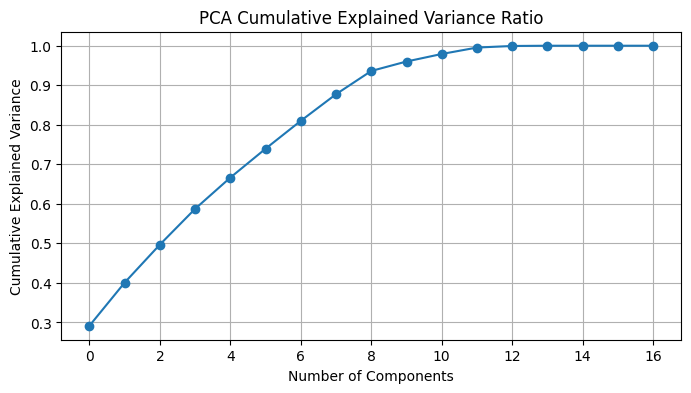

In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()


pca_data=Original_df_enc.drop(columns= ['y','y_encoded'])
pca.fit(pca_data)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=8)
pca.fit(pca_data)
principalComponents = pca.transform(pca_data)
pca_df = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8'])#'pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16',
pc = pca.transform(pred_df_enc)
fianl_pred_df_enc = pd.DataFrame(data=pc, columns=['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
fianl_pred_df_enc



,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,1.453481,0.562044,0.729084,-0.546707,1.280152,0.381615,-0.313373,-1.291936
1,3.576192,0.752777,0.336376,-0.075317,0.642680,-0.082304,0.357514,0.270668
2,-1.539968,-0.216757,0.501004,-0.754383,0.490858,-1.056074,-0.786778,-0.097293
3,1.997991,0.466952,0.480714,-2.054740,0.036292,-1.015745,-0.045131,-1.249814
4,-1.324489,-0.690095,1.681145,1.181658,0.258150,-0.705208,0.044404,0.342673
...,...,...,...,...,...,...,...,...
9995,-4.149998,2.163348,-0.148019,0.568074,0.222954,1.361727,1.538818,2.095366
9996,0.272697,0.251037,-0.276676,2.595933,1.215145,2.223852,-0.605233,-0.364677
9997,-0.321244,1.520750,-1.156421,-0.495069,-0.543281,1.723357,0.647388,-0.216942
9998,2.283851,2.136452,0.478211,-0.872161,0.226650,0.583657,-0.837354,0.927530


In [ ]:
best_params_trials = [
    {
        'n_estimators_RF': 262,
        'max_depth_RF': 21,
        'min_samples_split': 7,
        'min_samples_leaf': 6,
        'max_features': 'sqrt',
        'n_estimators_XGBRF': 594,
        'max_depth_XGBRF': 22,
        'learning_rate': 0.02278752916762405,
        'subsample': 0.184835021679959,
        'colsample_bytree': 0.793164031301065,
        'C': 2.2341623954216674,
        'kernel': 'rbf',
        'gamma': 'auto'
  }
]
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators_RF'],
    max_depth=best_params['max_depth_RF'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=random_seed
)

xgbrf_best = XGBRFClassifier(
    n_estimators=best_params['n_estimators_XGBRF'],
    max_depth=best_params['max_depth_XGBRF'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=random_seed
)

svm_best = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    gamma=best_params['gamma'],
    random_state=random_seed
)

stacking_clf_best = StackingClassifier(
    estimators=[('rf', rf_best), ('xgbrf', xgbrf_best), ('svm', svm_best)],
    final_estimator=LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0, random_state=random_seed),
)

stacking_clf_best.fit(X_train, y_train)
y_pred_final = stacking_clf_best.predict(fianl_pred_df_enc)
y_pred_final

In [ ]:
def assign_pred(y_pred_final):
    if x == 0:
        return 'Atsorg'
    elif x == 1:
        return 'Bobsuto'
    elif x == 2:
        return 'Jorgutob'
    else:
        return None

df['pred'] = df['y_pred_final'].apply(assign_pred)